In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# libraries
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle
file = open("data_RUS_risk2_dummy","rb")
X_train = pickle.load(file)
y_train = pickle.load(file)
X_test = pickle.load(file)
y_test = pickle.load(file)
file.close()

In [3]:
X_train.head(2)

,menopaus_0,agegrp_2,agegrp_3,agegrp_4,agegrp_5,agegrp_6,agegrp_7,agegrp_8,agegrp_9,agegrp_10,...,race_5,hispanic_0,hispanic_1,bmi_3,bmi_4,agefirst_1,agefirst_2,nrelbc_0,nrelbc_2,lastmamm_1
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [4]:
X_test.head(2)

,menopaus_0,agegrp_2,agegrp_3,agegrp_4,agegrp_5,agegrp_6,agegrp_7,agegrp_8,agegrp_9,agegrp_10,...,race_5,hispanic_0,hispanic_1,bmi_3,bmi_4,agefirst_1,agefirst_2,nrelbc_0,nrelbc_2,lastmamm_1
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [5]:
X_train.shape

(8586, 25)

In [6]:
X_test.shape

(59501, 25)

# Model Building on Cancer Data

## <span style="color:blue">Model 3 - Weighted Random Forest</span>

In [7]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score

def model_stats(X, y, y_pred, model):

    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix ->")
    print(cm)

    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives
    
    print("Accuracy:",accuracy_score(y, y_pred))
    sensi=TP / float(TP+FN)
    speci=TN / float(TN+FP)
    # Let's see the sensitivity of our model
    print("Sensitivity:", sensi)

    # Let us calculate specificity
    print("Specificity:", speci)
    print("Average of Sensitivity and Specificity:", (sensi+speci)/2)

    # Let us calculate precision
    print("Precision",TP / float(TP+FP))
    print("MCC ", metrics.matthews_corrcoef(y, y_pred))
    print("F1 ", metrics.fbeta_score(y, y_pred, beta = 1))
    print("F2 ", metrics.fbeta_score(y, y_pred, beta = 2))
    print("F3 ", metrics.fbeta_score(y, y_pred, beta = 3))
    
    # Predicting probability for roc_auc
    pred_probs = model.predict_proba(X)[:,1]
    print("ROC-AUC : {:2.2}".format(roc_auc_score(y, pred_probs)))

    # Plotting ROC curve
    fpr, tpr, thresholds = roc_curve(y, pred_probs, drop_intermediate = False )
    auc_score = roc_auc_score(y, pred_probs)
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    

### Default Hyperparameters

Let's first fit a random forest model with default hyperparameters.

In [8]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [9]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(random_state = 100)

# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

 Let's check the evaluation metrics of our default model

In [10]:
# Making predictions
y_pred_train = rfc.predict(X_train) # For train data
y_pred_test = rfc.predict(X_test) # For test data

Confusion Matrix ->
[[2922 1371]
 [ 798 3495]]
Accuracy: 0.7473794549266247
Sensitivity: 0.8141160027952481
Specificity: 0.6806429070580013
Average of Sensitivity and Specificity: 0.7473794549266247
Precision 0.718249075215783
MCC  0.4992257638693404
F1  0.7631837536849001
F2  0.7929485434249932
F3  0.8033928694572788
ROC-AUC : 0.83


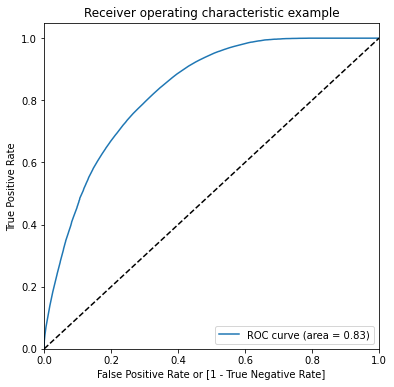

In [11]:
model_stats(X_train, y_train, y_pred_train, rfc)

Confusion Matrix ->
[[31020 26910]
 [  419  1152]]
Accuracy: 0.5406967950118485
Sensitivity: 0.7332908975175048
Specificity: 0.5354738477472812
Average of Sensitivity and Specificity: 0.6343823726323929
Precision 0.04105195638229634
MCC  0.08632140194087878
F1  0.07775115580602707
F2  0.16770511849997086
F3  0.27297931328641495
ROC-AUC : 0.69


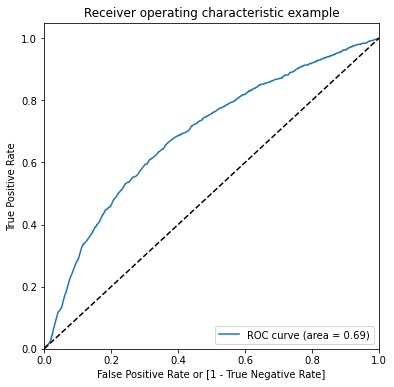

In [12]:
model_stats(X_test, y_test, y_pred_test, rfc)

### Hyperparameter Tuning

The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.


- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- **criterion**: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split:
- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**
- **max_leaf_nodes** : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

### Grid Search to Find Optimal Hyperparameters

In [13]:
#We can now find the optimal hyperparameters using GridSearchCV.
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [14]:
# Create a cross validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

In [15]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [50,100,150,200,250,300]
}

# Create a based model
rf = RandomForestClassifier(random_state = 100)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='balanced_accuracy',
                          cv = folds, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   18.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RandomForestClassifier(random_state=100), n_jobs=-1,
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='balanced_accuracy', verbose=1)

In [16]:
# printing the optimal accuracy score and hyperparameters
print("best balanced_accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best balanced_accuracy 0.6614284241175976
RandomForestClassifier(random_state=100)


In [17]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion' : ['gini','entropy']
}

# Create a based model
rf = RandomForestClassifier(random_state = 100)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = folds, scoring='balanced_accuracy', 
                           n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# printing the optimal accuracy score and hyperparameters
print("best balanced_accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.7s finished


best balanced_accuracy 0.6614284241175976
RandomForestClassifier(random_state=100)


In [18]:
# Create the parameter grid based on the results of random search 
param_grid = {
    #'max_depth': [4,6,8],
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(200, 500, 100)
}

# Create a model
rf = RandomForestClassifier(random_state = 100, max_depth=6)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = folds, scoring='balanced_accuracy', 
                           n_jobs = -1,verbose = 1)



# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.9s finished


best accuracy 0.6481494446570115
RandomForestClassifier(max_depth=6, min_samples_leaf=100, min_samples_split=400,
                       random_state=100)


In [19]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,6,8]
}

# Create a model
rf = RandomForestClassifier(random_state = 100)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = folds, scoring='balanced_accuracy', 
                           n_jobs = -1,verbose = 1)



# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.5s finished


best accuracy 0.6642237273785586
RandomForestClassifier(max_depth=8, random_state=100)


In [20]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_samples': [0.2,0.4,0.6,0.8,1]
}

# Create a model
rf = RandomForestClassifier(max_depth=8, random_state=100)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = folds, scoring='balanced_accuracy', 
                           n_jobs = -1,verbose = 1)



# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.0s finished


best accuracy 0.667486316555001
RandomForestClassifier(max_depth=8, max_samples=0.2, random_state=100)


### Fitting the final model with the best parameters obtained from grid search

In [21]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=8, max_samples=0.2, random_state=100)


# fit
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_samples=0.2, random_state=100)

In [22]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

In [23]:
# feature_importance
importance = rf.feature_importances_

features=X_train.columns
# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).\
                     reset_index(drop=True)
feature_importance

,variables,importance_percentage
0,hispanic_0,18.694377
1,density_1,11.988218
2,hispanic_1,6.409315
3,race_2,6.350086
4,nrelbc_0,5.574715
5,agefirst_2,4.881519
6,bmi_4,4.578879
7,race_5,4.350822
8,lastmamm_1,4.112845
9,race_4,4.001900


In [23]:
#y_pred_train = (rf.predict_proba(X_train)[:,1]>=0.47).astype(bool)

### Model evaluation on train and test data

Confusion Matrix ->
[[2890 1403]
 [1353 2940]]
Accuracy: 0.6790123456790124
Sensitivity: 0.6848357791754018
Specificity: 0.6731889121826229
Average of Sensitivity and Specificity: 0.6790123456790124
Precision 0.6769514160718397
MCC  0.35804897676588954
F1  0.6808707735062529
F2  0.683244248198931
F3  0.6840390879478827
ROC-AUC : 0.75


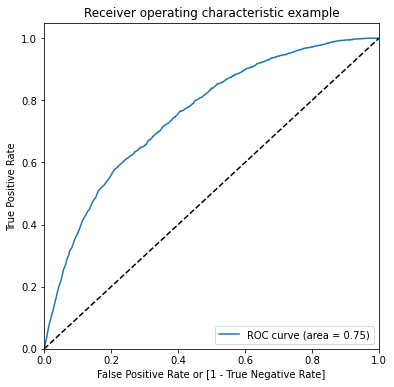

In [24]:
model_stats(X_train, y_train, y_pred_train, rf)

In [25]:
#y_pred_test = (rf.predict_proba(X_test)[:,1]>=0.47).astype(bool)

Confusion Matrix ->
[[34598 23332]
 [  476  1095]]
Accuracy: 0.599872271054268
Sensitivity: 0.6970082749840866
Specificity: 0.5972380459174866
Average of Sensitivity and Specificity: 0.6471231604507865
Precision 0.04482744504032423
MCC  0.09590101045430095
F1  0.08423724901915532
F2  0.1782748852202794
F3  0.28392884924544937
ROC-AUC : 0.7


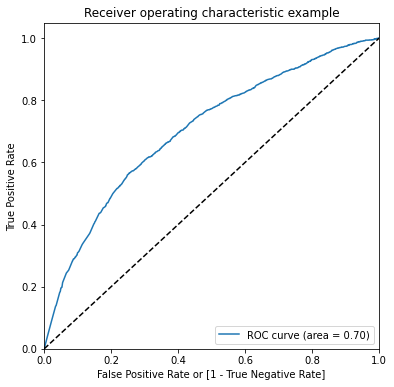

In [25]:
model_stats(X_test, y_test, y_pred_test, rf)